<div class="alert alert-block alert-success">
    
    
# <center> Project - Phase 3 </center>
## <center> Descriptive Statistics </center>
### <center> Exploratory Data Analysis</center>


<br>
    
</div>

<div class="alert alert-block alert-danger">
    
    

### Requirements: 
- Load and inspect Transactions.csv dataset
- Execute descriptive analytics tasks for Orders distribution for products sold in different Zip Codes


<br>
    
</div>

In [8]:
# import sys
# !{sys.executable} -m pip install py2neo

In [9]:
import pandas as pd

import datetime
from datetime import datetime, date, timedelta
import time
from math import isnan
import numpy as np

import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

from py2neo import Graph, Node, Relationship


In [10]:
import numpy
print(numpy.__version__)

1.22.2




<div class="alert alert-info">

  
    
## Load and Preprocess the data
- Count how many total deliveries
- Count how many deliveries per Zip Code
- Total number of Orders 
- Total number of Orders per Zip Code
- Total Number of Products ordered per Zip Code
- Total Number of Orders for every Product in every Zip Code per Month

</div>
    
    
    


In [11]:
df = pd.read_csv('Transactions.csv')
df = df.dropna()
df['Delivery_Zip_Code'] = df['Delivery_Zip_Code'].astype(int)
df.head()

CustomerID FirstName  LastName     CreditCardNumber  \
0  566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
1  274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2  455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
3  254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
4  563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                OrderID Customer_Occupation  \
0  50787284-d78d-4b6a-b93f-7419b0d46590              Lawyer   
1  f61639d7-28de-4507-a63a-71e99921d8f9              Lawyer   
2  7b1caf69-bd5b-441c-9115-6fa31ba1c313              Lawyer   
3  cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5               Actor   
4  a9d66460-a48f-419f-8d39-7818290a3041               Actor   

   Credit_Card_Number  Order_ID  Order_Date Expected_Delivery_Date  ...  \
0         12345789032        98    4/7/2020              4/11/2020  ...   
1         12345789032       131   5/10/2020              5/14/2020  ...   
2         12345789032       318  11/13/2020             11/17/2020  ...   
3         12345789032       528   2/12/2020              2/16/2020  ...   
4         12345789032       561   2/12/2020              2/16/2020  ...   

   Product_Name Category  Manufacturer Review_Rating Delivery_Tracking_ID  \
0  Fitbit small  fitness  Fitbit small             3                   98   
1  Fitbit small  fitness  Fitbit small             3                  131   
2  Fitbit small  fitness  Fitbit small             3                  318   
3  Fitbit large  fitness  Fitbit large             5                  528   
4  Fitbit large  fitness  Fitbit large             5                  561   

   Delivery_Type  Delivery_Zip_Code Transaction_Status  Order_Returned  \
0         Pickup              10048           Disputed               1   
1         Pickup              10048           Disputed               1   
2         Pickup              10048           Disputed               1   
3         Pickup              10048           Disputed               0   
4         Pickup              10048           Disputed               0   

  Order_Delivered_on_Time  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  

[5 rows x 22 columns]

In [12]:
df['Order_ID'].count()

16372

In [13]:
df['Expected_Delivery_Date'] = pd.to_datetime(df['Expected_Delivery_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])
df.set_index('Actual_Delivery_Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

<ipython-input-13-3bf3e74c753b>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = df.index.weekofyear


In [14]:
df.dtypes

CustomerID                         object
FirstName                          object
LastName                           object
CreditCardNumber                   object
OrderID                            object
Customer_Occupation                object
Credit_Card_Number                  int64
Order_ID                            int64
Order_Date                 datetime64[ns]
Expected_Delivery_Date     datetime64[ns]
Product_ID                         object
Product_Name                       object
Category                           object
Manufacturer                       object
Review_Rating                       int64
Delivery_Tracking_ID                int64
Delivery_Type                      object
Delivery_Zip_Code                   int32
Transaction_Status                 object
Order_Returned                      int64
Order_Delivered_on_Time             int64
year                                int64
month                               int64
day                               

In [15]:
df.head()

CustomerID FirstName  LastName     CreditCardNumber  \
Actual_Delivery_Date                                                         
2020-04-15            566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
2020-05-18            274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2020-11-21            455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
2020-02-20            254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
2020-02-20            563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                                   OrderID  \
Actual_Delivery_Date                                         
2020-04-15            50787284-d78d-4b6a-b93f-7419b0d46590   
2020-05-18            f61639d7-28de-4507-a63a-71e99921d8f9   
2020-11-21            7b1caf69-bd5b-441c-9115-6fa31ba1c313   
2020-02-20            cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5   
2020-02-20            a9d66460-a48f-419f-8d39-7818290a3041   

                     Customer_Occupation  Credit_Card_Number  Order_ID  \
Actual_Delivery_Date                                                     
2020-04-15                        Lawyer         12345789032        98   
2020-05-18                        Lawyer         12345789032       131   
2020-11-21                        Lawyer         12345789032       318   
2020-02-20                         Actor         12345789032       528   
2020-02-20                         Actor         12345789032       561   

                     Order_Date Expected_Delivery_Date  ...  \
Actual_Delivery_Date                                    ...   
2020-04-15           2020-04-07             2020-04-11  ...   
2020-05-18           2020-05-10             2020-05-14  ...   
2020-11-21           2020-11-13             2020-11-17  ...   
2020-02-20           2020-02-12             2020-02-16  ...   
2020-02-20           2020-02-12             2020-02-16  ...   

                     Delivery_Tracking_ID Delivery_Type Delivery_Zip_Code  \
Actual_Delivery_Date                                                        
2020-04-15                             98        Pickup             10048   
2020-05-18                            131        Pickup             10048   
2020-11-21                            318        Pickup             10048   
2020-02-20                            528        Pickup             10048   
2020-02-20                            561        Pickup             10048   

                     Transaction_Status  Order_Returned  \
Actual_Delivery_Date                                      
2020-04-15                     Disputed               1   
2020-05-18                     Disputed               1   
2020-11-21                     Disputed               1   
2020-02-20                     Disputed               0   
2020-02-20                     Disputed               0   

                      Order_Delivered_on_Time  year  month day  week_of_year  
Actual_Delivery_Date                                                          
2020-04-15                                  1  2020      4  15            16  
2020-05-18                                  1  2020      5  18            21  
2020-11-21                                  1  2020     11  21            47  
2020-02-20                                  1  2020      2  20             8  
2020-02-20                                  1  2020      2  20             8  

[5 rows x 25 columns]





<div class="alert alert-info">

  
    
## Descriptive Analytics


</div>
    

In [16]:
df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product')

Product_Name  Total_orders_per_product
0           Bose                       910
1   Fitbit large                      2903
2   Fitbit small                      2904
3  Harman Kardon                      1445
4            JBL                       910
5       Logitech                      1525
6          Redmi                       910
7    Samsung s10                       910
8           Sony                      2435
9            VR7                      1520

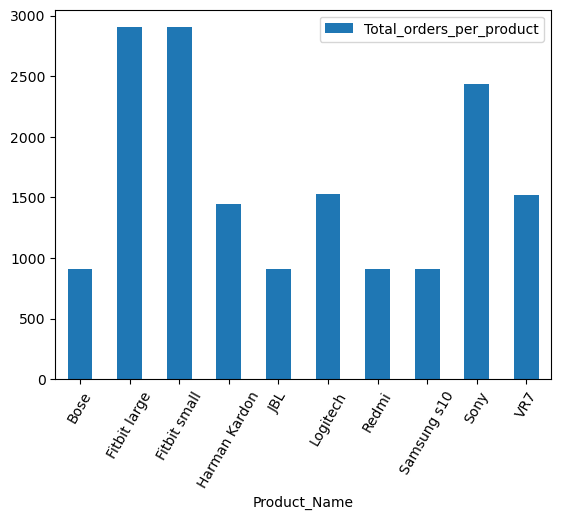

In [17]:
ax = df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product').plot.bar(x='Product_Name', y='Total_orders_per_product', rot=60)

plt.show(ax)




<div class="alert alert-info">

  
    
## Deliveries/Orders per  Zip Code Distribution


</div>
    


In [18]:
df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zipcode')

Delivery_Zip_Code  Total_orders_per_zipcode
0               10048                       413
1               10110                       394
2               10121                       391
3               10123                       439
4               10168                       416
..                ...                       ...
57              90076                       369
58              90077                       292
59              90080                       301
60              90097                       395
61              90774                       388

[62 rows x 2 columns]

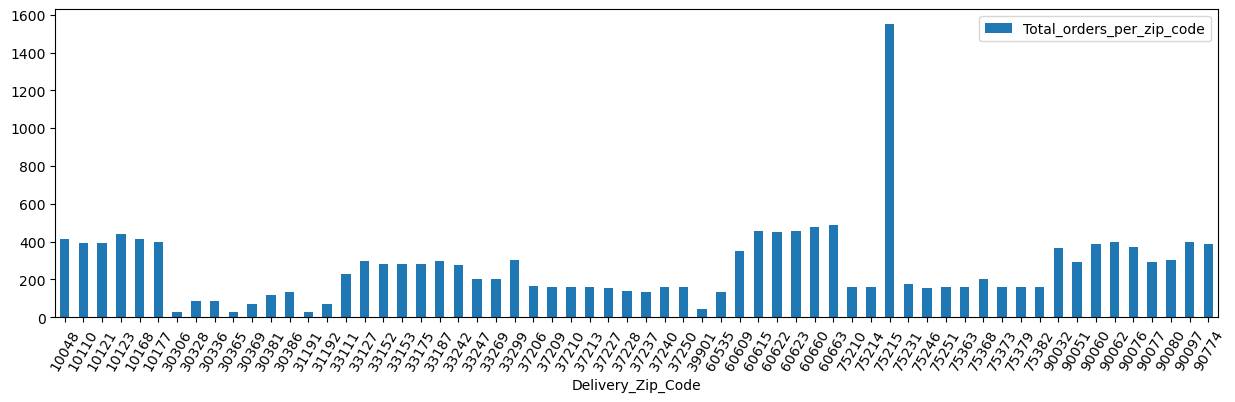

In [19]:
ax1 = df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zip_code').plot.bar(x='Delivery_Zip_Code', y='Total_orders_per_zip_code', rot=60, figsize=(15, 4))

plt.show(ax1)

In [20]:
Categories = df['Category'].unique()
Categories

array(['fitness', 'phone', 'speaker', 'tv', 'vr'], dtype=object)

In [21]:
Zips = df['Delivery_Zip_Code'].unique()
Zips

array([10048, 10110, 10121, 10123, 10168, 10177, 30306, 30328, 30336,
       30365, 30369, 30381, 30386, 31191, 31192, 33111, 33127, 33152,
       33153, 33175, 33187, 33242, 33247, 33269, 33299, 37206, 37209,
       37210, 37213, 37227, 37228, 37237, 37240, 37250, 39901, 60609,
       60535, 60615, 60622, 60623, 60660, 60663, 75210, 75214, 75215,
       75231, 75246, 75251, 75363, 75368, 75373, 75379, 75382, 90032,
       90051, 90060, 90062, 90076, 90077, 90080, 90097, 90774])

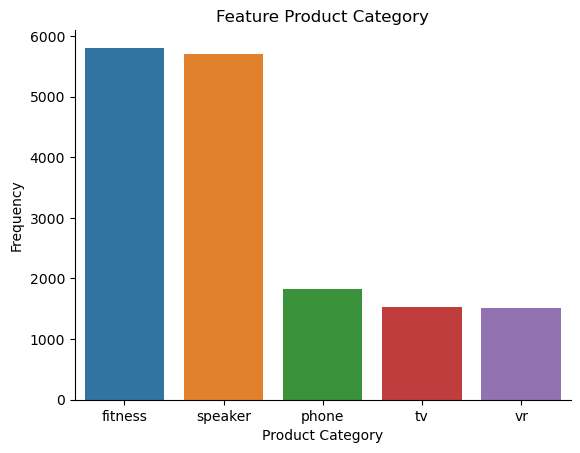

In [22]:
sort_X1 = df.groupby('Category').size()\
                    .sort_values(ascending=False)\
                    .index
#plt.figure(figsize=(12,6))
sns.countplot(x='Category', data=df, order = sort_X1)
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Feature Product Category')
sns.despine();
plt.show()

In [23]:
df_bx = pd.DataFrame({'count' : df.groupby( [ "Category", "Delivery_Zip_Code"] ).size()}).reset_index()


df_bx[1:303]

Category  Delivery_Zip_Code  count
1    fitness              10110    139
2    fitness              10121    137
3    fitness              10123    154
4    fitness              10168    147
5    fitness              10177    148
..       ...                ...    ...
298       vr              90060     38
299       vr              90062     41
300       vr              90076     40
301       vr              90077     27
302       vr              90080     23

[302 rows x 3 columns]

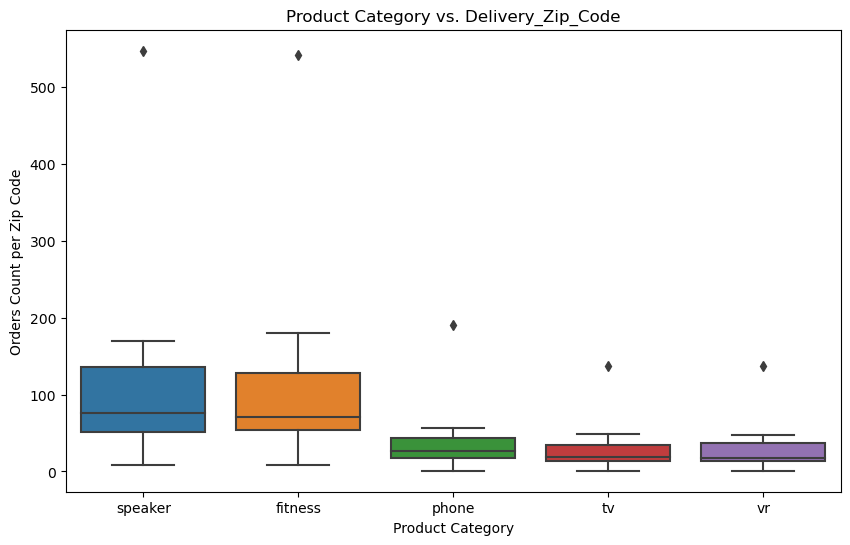

In [24]:
sort_y = df_bx.groupby('Category')['count']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10, 6))

sns.boxplot(y='count', x='Category', data=df_bx, order=sort_y)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Product Category')
plt.ylabel('Orders Count per Zip Code')
plt.title('Product Category vs. Delivery_Zip_Code')
plt.show();



<div class="alert alert-info">

  
    
## Time Series Forecasting

- Calculate Total number of orders per Date


</div>



In [25]:
slice_for_zip_code = df.loc[df['Delivery_Zip_Code'] == 60535]

In [26]:
df_deliveries_count = slice_for_zip_code.groupby(['Expected_Delivery_Date'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')
df_deliveries_count

Expected_Delivery_Date  Total_Number_of_orders
0               2018-01-10                       1
1               2018-01-16                       1
2               2018-01-18                       2
3               2018-01-31                       1
4               2018-02-05                       1
..                     ...                     ...
107             2020-11-11                       1
108             2020-11-18                       1
109             2020-11-26                       1
110             2020-11-29                       1
111             2020-12-19                       1

[112 rows x 2 columns]


<div class="alert alert-info">

  
    
## Distribution of Products Bought in Zip Codes

- Create 6-months bins


</div>






In [27]:
bins_dt = pd.date_range('2018-01-01', freq='6MS', periods=8)
bins_str = bins_dt.astype(str).values

labels = ['(2018-01-01, 2018-06-31)',
          '(2018-07-01, 2018-12-31)',
          '(2019-01-01, 2019-06-31)',
          '(2019-07-01, 2019-12-31)',
          '(2020-01-01, 2020-06-31)',
          '(2020-07-01, 2020-12-31)',
          '(2021-01-01, 2021-06-31)']
df_6_months_bins = df.groupby(['Expected_Delivery_Date'
                   ,'Product_Name'
                   ,'Delivery_Zip_Code'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')

df_6_months_bins['bins'] = pd.cut(df_6_months_bins['Expected_Delivery_Date'].astype(np.int64)//10**9,
                   bins=bins_dt.astype(np.int64)//10**9,
                   labels=labels)

In [28]:
df_6_months_bins

Expected_Delivery_Date Product_Name  Delivery_Zip_Code  \
0                 2018-01-05     Logitech              33242   
1                 2018-01-05     Logitech              60622   
2                 2018-01-05     Logitech              75215   
3                 2018-01-05     Logitech              90062   
4                 2018-01-05        Redmi              37210   
...                      ...          ...                ...   
12102             2021-01-04  Samsung s10              10123   
12103             2021-01-04  Samsung s10              33127   
12104             2021-01-04  Samsung s10              75210   
12105             2021-01-04  Samsung s10              75214   
12106             2021-01-04  Samsung s10              75215   

       Total_Number_of_orders                      bins  
0                           2  (2018-01-01, 2018-06-31)  
1                           1  (2018-01-01, 2018-06-31)  
2                           1  (2018-01-01, 2018-06-31)  
3                           1  (2018-01-01, 2018-06-31)  
4                           1  (2018-01-01, 2018-06-31)  
...                       ...                       ...  
12102                       1  (2021-01-01, 2021-06-31)  
12103                       1  (2021-01-01, 2021-06-31)  
12104                       1  (2021-01-01, 2021-06-31)  
12105                       1  (2021-01-01, 2021-06-31)  
12106                       1  (2021-01-01, 2021-06-31)  

[12107 rows x 5 columns]

In [29]:
grouped_bin_df = df_6_months_bins.groupby(['bins','Product_Name','Delivery_Zip_Code'])['Total_Number_of_orders'].sum().reset_index(name ='Total_Number_of_orders')
grouped_bin_df['Total_Number_of_orders'] = grouped_bin_df['Total_Number_of_orders'].fillna(0)
grouped_bin_df.head(10)

bins Product_Name  Delivery_Zip_Code  \
0  (2018-01-01, 2018-06-31)         Bose              10048   
1  (2018-01-01, 2018-06-31)         Bose              10110   
2  (2018-01-01, 2018-06-31)         Bose              10121   
3  (2018-01-01, 2018-06-31)         Bose              10123   
4  (2018-01-01, 2018-06-31)         Bose              10168   
5  (2018-01-01, 2018-06-31)         Bose              10177   
6  (2018-01-01, 2018-06-31)         Bose              30306   
7  (2018-01-01, 2018-06-31)         Bose              30328   
8  (2018-01-01, 2018-06-31)         Bose              30336   
9  (2018-01-01, 2018-06-31)         Bose              30365   

   Total_Number_of_orders  
0                     2.0  
1                     2.0  
2                     1.0  
3                     2.0  
4                     4.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     2.0  
9                     0.0


<div class="alert alert-info">

  
    
## Lets filter total orders for specific list of Zip Codes

- List of Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]


</div>


In [30]:
zip_codes = [60623, 60663, 60609, 60660, 60615, 60622]
grouped_bin_df = grouped_bin_df[grouped_bin_df.Delivery_Zip_Code.isin(zip_codes)]
grouped_bin_df

bins Product_Name  Delivery_Zip_Code  \
36    (2018-01-01, 2018-06-31)         Bose              60609   
37    (2018-01-01, 2018-06-31)         Bose              60615   
38    (2018-01-01, 2018-06-31)         Bose              60622   
39    (2018-01-01, 2018-06-31)         Bose              60623   
40    (2018-01-01, 2018-06-31)         Bose              60660   
...                        ...          ...                ...   
4315  (2021-01-01, 2021-06-31)          VR7              60615   
4316  (2021-01-01, 2021-06-31)          VR7              60622   
4317  (2021-01-01, 2021-06-31)          VR7              60623   
4318  (2021-01-01, 2021-06-31)          VR7              60660   
4319  (2021-01-01, 2021-06-31)          VR7              60663   

      Total_Number_of_orders  
36                       6.0  
37                       2.0  
38                       8.0  
39                       3.0  
40                       7.0  
...                      ...  
4315                     0.0  
4316                     0.0  
4317                     0.0  
4318                     0.0  
4319                     0.0  

[420 rows x 4 columns]

<ipython-input-31-7891e7fec997>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha=ha[0])


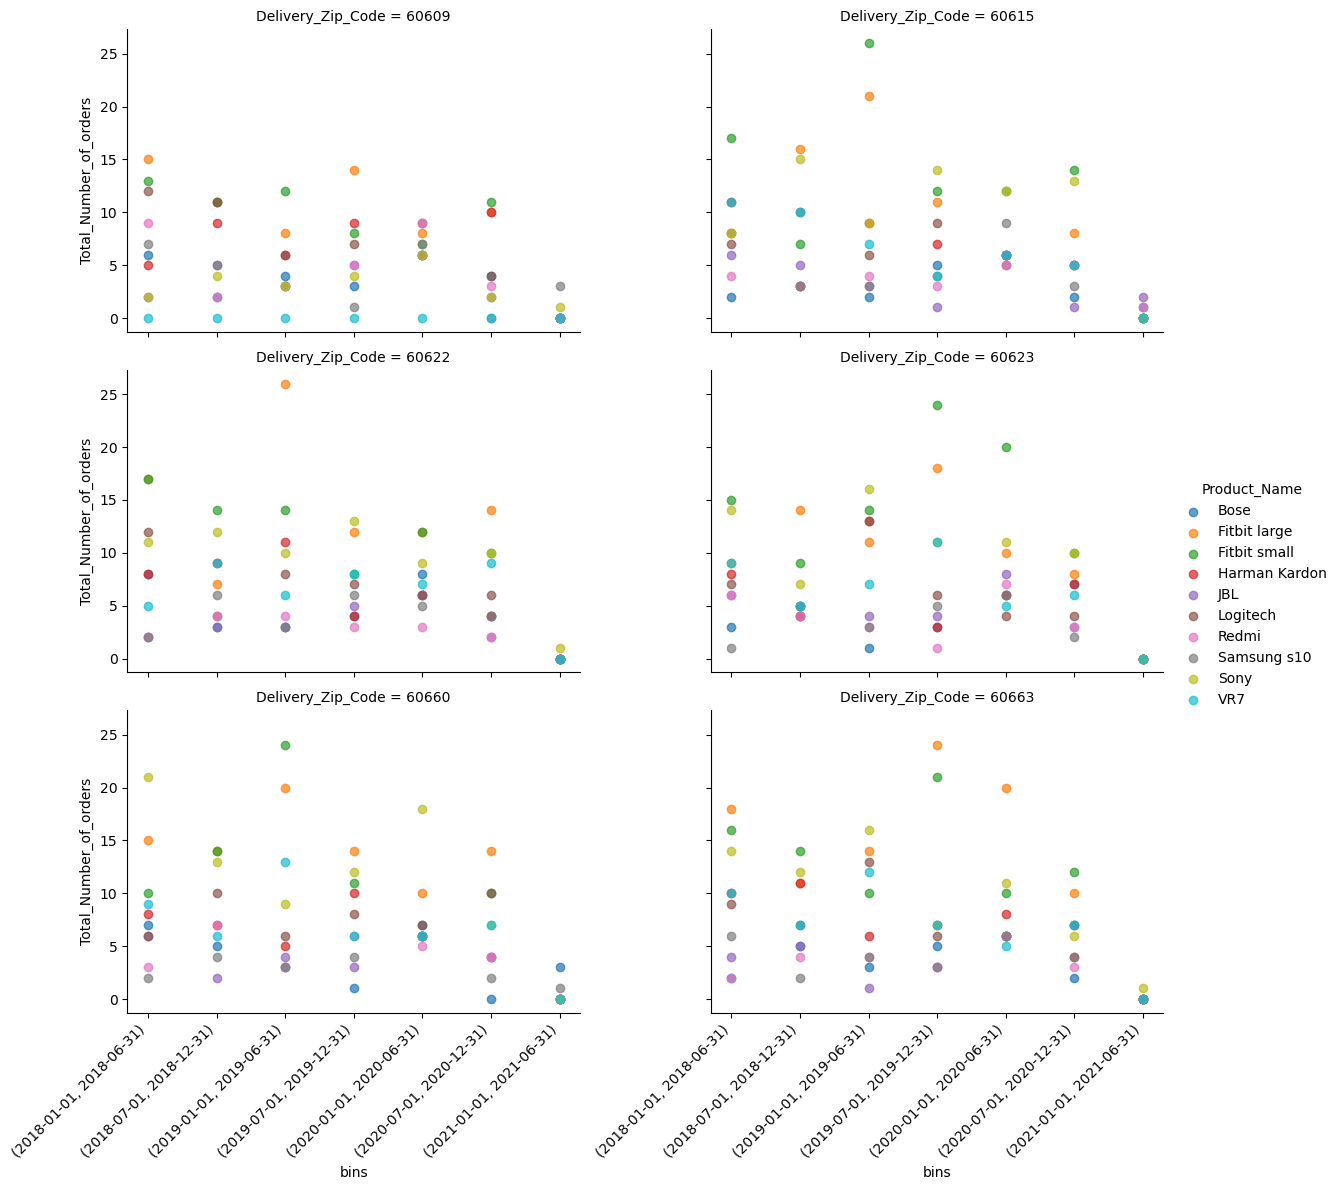

In [31]:
g = sns.FacetGrid(grouped_bin_df, col="Delivery_Zip_Code", hue="Product_Name", margin_titles=True, col_wrap=2, height=4, aspect=1.5)
g.map(plt.scatter, 'bins', 'Total_Number_of_orders', alpha=.7)
ha = ['right', 'center', 'left']
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha=ha[0])
plt.tight_layout(h_pad=1)
g.add_legend();
plt.show(g)




<div class="alert alert-info">

  
    
## Total number of Orders per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


In [32]:
monthly_df = df.groupby(['month',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df = monthly_df[monthly_df.Delivery_Zip_Code.isin(zip_codes)]
monthly_df

month  Delivery_Zip_Code  Total_Number_of_orders_per_month
36       1              60609                                45
37       1              60615                                59
38       1              60622                                54
39       1              60623                                68
40       1              60660                                66
..     ...                ...                               ...
714     12              60615                                39
715     12              60622                                36
716     12              60623                                32
717     12              60660                                41
718     12              60663                                40

[72 rows x 3 columns]

In [33]:
monthly_df_products = df.groupby(['month',
                         'Product_Name',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df_products = monthly_df_products[monthly_df_products.Delivery_Zip_Code.isin(zip_codes)]
monthly_df_products

month Product_Name  Delivery_Zip_Code  Total_Number_of_orders_per_month
21        1         Bose              60609                                 4
22        1         Bose              60615                                 4
23        1         Bose              60622                                 4
24        1         Bose              60623                                 2
25        1         Bose              60660                                 6
...     ...          ...                ...                               ...
4973     12          VR7              60615                                 2
4974     12          VR7              60622                                 4
4975     12          VR7              60623                                 4
4976     12          VR7              60660                                 2
4977     12          VR7              60663                                 5

[639 rows x 4 columns]




<div class="alert alert-info">

  
    
## Total number of Orders  per Zip Code per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


C:\Users\rache\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


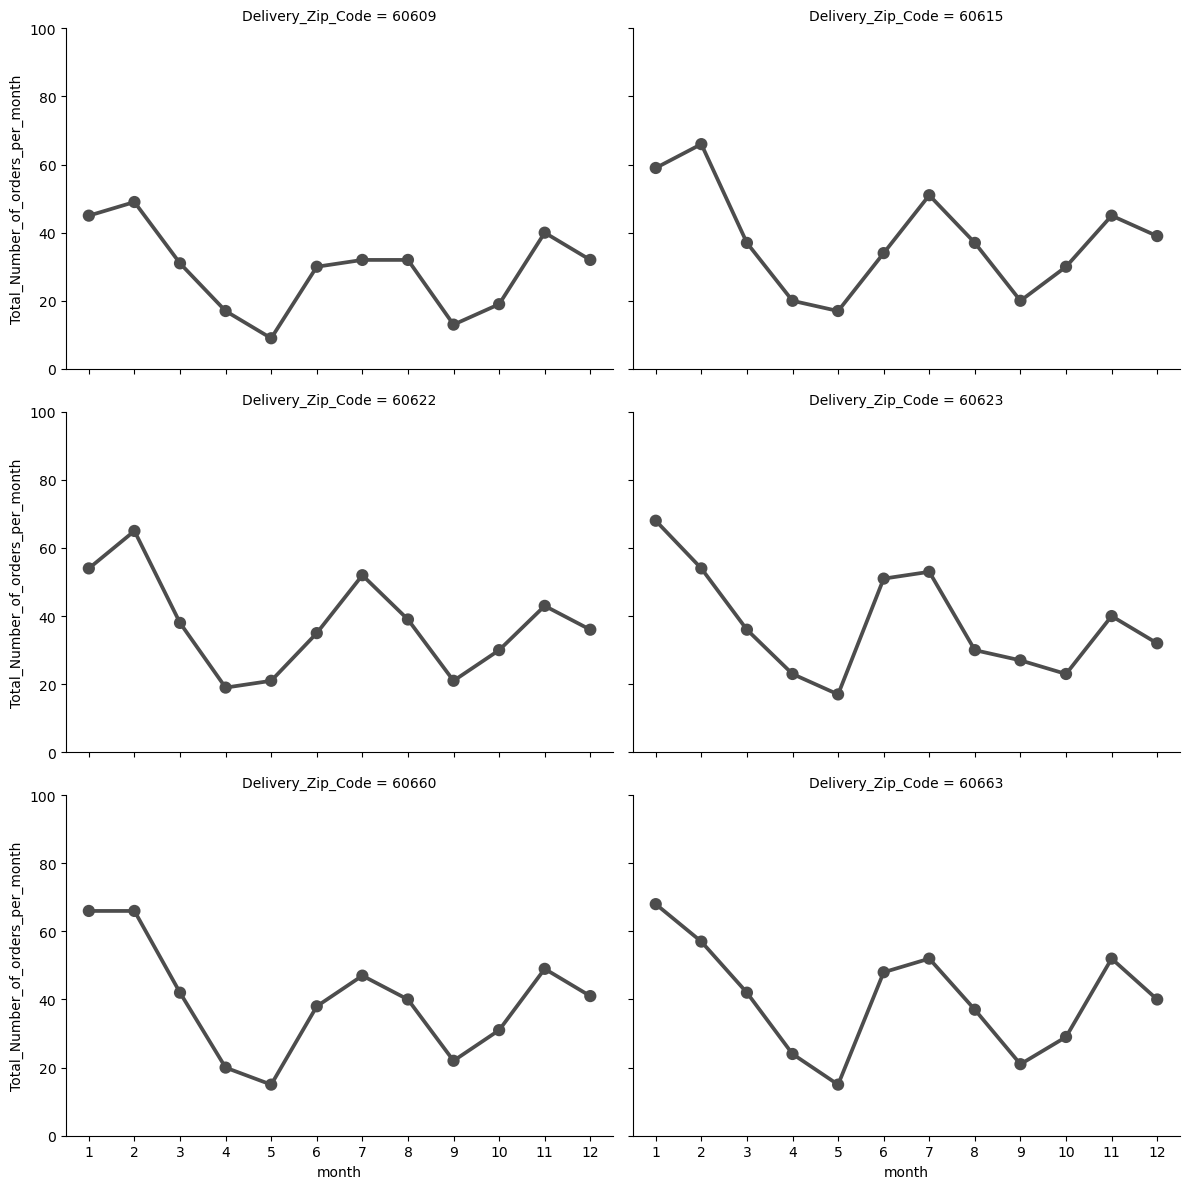

In [34]:
g = sns.FacetGrid(monthly_df, col="Delivery_Zip_Code", col_wrap=2,  ylim=(0, 100), height=4, aspect=1.5)
g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", color=".3", ci=None);
plt.show(g)





<div class="alert alert-info">

  
    
## Total Number of Orders per Product per Zip Code per Month:
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]





</div>

C:\Users\rache\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


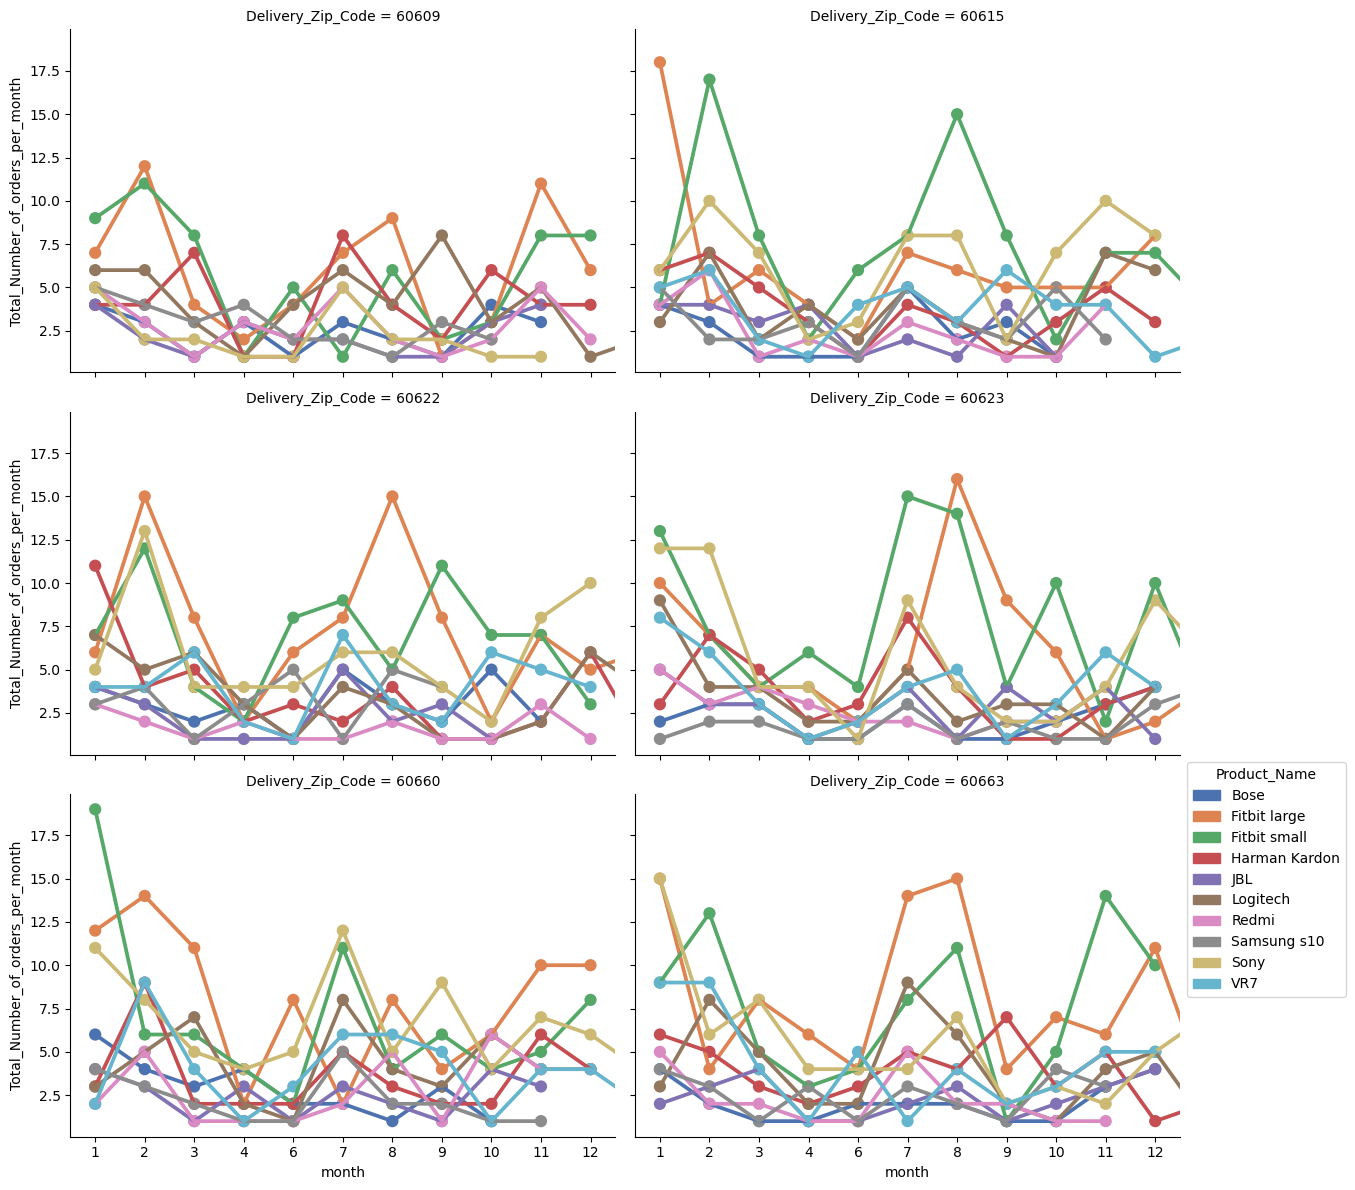

In [35]:
from matplotlib import patches
g = sns.FacetGrid(monthly_df_products, col="Delivery_Zip_Code", 
                  hue="Product_Name",
                  margin_titles=True, 
                  col_wrap=2, palette="deep", 
                  height=4, aspect=1.5)

g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", ci=None)  # 
labels = ["Bose","Fitbit large","Fitbit small","Harman Kardon","JBL","Logitech","Redmi","Samsung s10","Sony","VR7"] #hue_order
colors = sns.color_palette("deep").as_hex()[:len(labels)]
handles=[patches.Patch(color=col,label=lab) for col,lab in zip(colors,labels)]
plt.legend(handles=handles,title='Product_Name',loc='center left',bbox_to_anchor=(1,0.75));
plt.show(g)

In [36]:
fig = px.line(df_deliveries_count, x='Expected_Delivery_Date', y='Total_Number_of_orders')
fig.update_layout(title_text='Time Series of daily order counts for all users for zip code: 60535')
fig.show()



<div class="alert alert-success">

# Project Phase 3 
    
## Requirements

    

</div>

<div class="alert alert-info">   
    
## Requirement #3
### Forecast the number of returned orders for every warehouse
    - Consider calculating only the simple average to forecast per day, week, month for every warehouse
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [37]:
# ADD YOUR CODE HERE
# Bring in distribution center data
df_dc = pd.read_csv('Warehouse_Distribution_Centers.csv')
df_dc.head()

Zip     City State   Latitude  Longitude  \
0  60651  Chicago    IL  41.901485  -87.74055   
1  60697  Chicago    IL  41.811929  -87.68732   
2  60667  Chicago    IL  41.811929  -87.68732   
3  60694  Chicago    IL  41.811929  -87.68732   
4  60684  Chicago    IL  41.811929  -87.68732   

  Facility_ID at given Location/Zip  \
0                       Warehouse_1   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   Distribution Center ID Serving this Zip Code  \
0                          DistributionCenter_1   
1                          DistributionCenter_1   
2                          DistributionCenter_1   
3                          DistributionCenter_1   
4                          DistributionCenter_1   

  Warehouse ID supplying this Distribution Center  
0                                     Warehouse_1  
1                                     Warehouse_1  
2                                     Warehouse_1  
3                                     Warehouse_1  
4                                     Warehouse_1

In [38]:
# little refresher on what's here
df

CustomerID FirstName  LastName     CreditCardNumber  \
Actual_Delivery_Date                                                         
2020-04-15            566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
2020-05-18            274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2020-11-21            455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
2020-02-20            254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
2020-02-20            563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   
...                           ...       ...       ...                  ...   
2019-06-15            564-40-9827     Madie    Mayert  xxxx-xxxx-xxxx-1592   
2019-09-07            627-64-3054   Vincent  Ondricka  xxxx-xxxx-xxxx-9291   
2019-03-05            564-40-9827     Madie    Mayert  xxxx-xxxx-xxxx-1592   
2019-01-29            416-42-9023     Lonzo     Tromp  xxxx-xxxx-xxxx-8745   
2019-03-09            177-25-9819        Bo      Veum  xxxx-xxxx-xxxx-7679   

                                                   OrderID  \
Actual_Delivery_Date                                         
2020-04-15            50787284-d78d-4b6a-b93f-7419b0d46590   
2020-05-18            f61639d7-28de-4507-a63a-71e99921d8f9   
2020-11-21            7b1caf69-bd5b-441c-9115-6fa31ba1c313   
2020-02-20            cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5   
2020-02-20            a9d66460-a48f-419f-8d39-7818290a3041   
...                                                    ...   
2019-06-15            1b69b9ee-3017-429e-9e1b-9994ead619c0   
2019-09-07            27f2841e-27cd-42d0-8000-f99b7ad7711d   
2019-03-05            46db23f8-a2aa-48e1-96c4-9c07e89ad8eb   
2019-01-29            dbffba44-ac7c-41d5-adfb-5298be07d057   
2019-03-09            e05ea8c5-027d-4db3-ba6b-666acab5f614   

                     Customer_Occupation  Credit_Card_Number  Order_ID  \
Actual_Delivery_Date                                                     
2020-04-15                        Lawyer         12345789032        98   
2020-05-18                        Lawyer         12345789032       131   
2020-11-21                        Lawyer         12345789032       318   
2020-02-20                         Actor         12345789032       528   
2020-02-20                         Actor         12345789032       561   
...                                  ...                 ...       ...   
2019-06-15                        Lawyer         12345789032     11949   
2019-09-07                        Lawyer         12345789032     12033   
2019-03-05                        Lawyer         12345789032     12236   
2019-01-29                         Actor         12345789032     12293   
2019-03-09                        Lawyer         12345789032     12360   

                     Order_Date Expected_Delivery_Date  ...  \
Actual_Delivery_Date                                    ...   
2020-04-15           2020-04-07             2020-04-11  ...   
2020-05-18           2020-05-10             2020-05-14  ...   
2020-11-21           2020-11-13             2020-11-17  ...   
2020-02-20           2020-02-12             2020-02-16  ...   
2020-02-20           2020-02-12             2020-02-16  ...   
...                         ...                    ...  ...   
2019-06-15           2019-06-07             2019-06-11  ...   
2019-09-07           2019-08-30             2019-09-03  ...   
2019-03-05           2019-02-25             2019-03-01  ...   
2019-01-29           2019-01-21             2019-01-25  ...   
2019-03-09           2019-03-01             2019-03-05  ...   

                     Delivery_Tracking_ID Delivery_Type Delivery_Zip_Code  \
Actual_Delivery_Date                                                        
2020-04-15                             98        Pickup             10048   
2020-05-18                            131        Pickup             10048   
2020-11-21                            318        Pickup             10048   
2020-02-20                       

In [39]:
df_merged = df.merge(df_dc, left_on='Delivery_Zip_Code', right_on='Zip')
print(df_merged.columns)
df_merged

Index(['CustomerID', 'FirstName', 'LastName', 'CreditCardNumber', 'OrderID',
       'Customer_Occupation', 'Credit_Card_Number', 'Order_ID', 'Order_Date',
       'Expected_Delivery_Date', 'Product_ID', 'Product_Name', 'Category',
       'Manufacturer', 'Review_Rating', 'Delivery_Tracking_ID',
       'Delivery_Type', 'Delivery_Zip_Code', 'Transaction_Status',
       'Order_Returned', 'Order_Delivered_on_Time', 'year', 'month', 'day',
       'week_of_year', 'Zip', 'City', 'State', 'Latitude', 'Longitude',
       'Facility_ID at given Location/Zip',
       ' Distribution Center ID Serving this Zip Code',
       'Warehouse ID supplying this Distribution Center'],
      dtype='object')


CustomerID FirstName  LastName     CreditCardNumber  \
0      566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
1      274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2      455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
3      254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
4      563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   
...            ...       ...       ...                  ...   
16236  564-40-9827     Madie    Mayert  xxxx-xxxx-xxxx-1592   
16237  627-64-3054   Vincent  Ondricka  xxxx-xxxx-xxxx-9291   
16238  564-40-9827     Madie    Mayert  xxxx-xxxx-xxxx-1592   
16239  416-42-9023     Lonzo     Tromp  xxxx-xxxx-xxxx-8745   
16240  177-25-9819        Bo      Veum  xxxx-xxxx-xxxx-7679   

                                    OrderID Customer_Occupation  \
0      50787284-d78d-4b6a-b93f-7419b0d46590              Lawyer   
1      f61639d7-28de-4507-a63a-71e99921d8f9              Lawyer   
2      7b1caf69-bd5b-441c-9115-6fa31ba1c313              Lawyer   
3      cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5               Actor   
4      a9d66460-a48f-419f-8d39-7818290a3041               Actor   
...                                     ...                 ...   
16236  1b69b9ee-3017-429e-9e1b-9994ead619c0              Lawyer   
16237  27f2841e-27cd-42d0-8000-f99b7ad7711d              Lawyer   
16238  46db23f8-a2aa-48e1-96c4-9c07e89ad8eb              Lawyer   
16239  dbffba44-ac7c-41d5-adfb-5298be07d057               Actor   
16240  e05ea8c5-027d-4db3-ba6b-666acab5f614              Lawyer   

       Credit_Card_Number  Order_ID Order_Date Expected_Delivery_Date  ...  \
0             12345789032        98 2020-04-07             2020-04-11  ...   
1             12345789032       131 2020-05-10             2020-05-14  ...   
2             12345789032       318 2020-11-13             2020-11-17  ...   
3             12345789032       528 2020-02-12             2020-02-16  ...   
4             12345789032       561 2020-02-12             2020-02-16  ...   
...                   ...       ...        ...                    ...  ...   
16236         12345789032     11949 2019-06-07             2019-06-11  ...   
16237         12345789032     12033 2019-08-30             2019-09-03  ...   
16238         12345789032     12236 2019-02-25             2019-03-01  ...   
16239         12345789032     12293 2019-01-21             2019-01-25  ...   
16240         12345789032     12360 2019-03-01             2019-03-05  ...   

      day week_of_year    Zip         City  State   Latitude   Longitude  \
0      15           16  10048     New York     NY  40.712086  -74.012270   
1      18           21  10048     New York     NY  40.712086  -74.012270   
2      21           47  10048     New York     NY  40.712086  -74.012270   
3      20            8  10048     New York     NY  40.712086  -74.012270   
4      20            8  10048     New York     NY  40.712086  -74.012270   
...    ..          ...    ...          ...    ...        ...         ...   
16236  15           24  90774  Los Angeles     CA  33.783038 -118.238683   
16237   7           36  90774  Los Angeles     CA  33.783038 -118.238683   
16238   5           10  90774  Los Angeles     CA  33.783038 -118.238683   
16239  29            5  90774  Los Angeles     CA  33.783038 -118.238683   
16240   9           10  90774  Los Angeles     CA  33.783038 -118.238683   

       Facility_ID at given Location/Zip  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
...                                  ...   
16236              DistributionCenter_37   
16237              DistributionCenter_37   
16238              DistributionCenter_37   
16239              DistributionCenter_37   
16240              DistributionCenter_37   

       Distribution Center ID Serving this Zip Code  \
0           

Looks like some transaction were lost here. That makes me think that some of the transaction data was not valid because it didn't join appropriately with our warehouse data.

In [40]:
avg_return_day_df = df_merged.groupby(['Warehouse ID supplying this Distribution Center', 'day'])['Order_Returned'].mean().reset_index(name = 'Average returns')
avg_return_day_df

Warehouse ID supplying this Distribution Center  day  Average returns
0                                       Warehouse_1    1         0.333333
1                                       Warehouse_1    2         0.566667
2                                       Warehouse_1    3         0.378641
3                                       Warehouse_1    4         0.441860
4                                       Warehouse_1    5         0.336735
..                                              ...  ...              ...
367                                     Warehouse_5   27         0.714286
368                                     Warehouse_5   28         0.272727
369                                     Warehouse_5   29         0.631579
370                                     Warehouse_5   30         0.200000
371                                     Warehouse_5   31         0.714286

[372 rows x 3 columns]

In [41]:
avg_return_week_df = df_merged.groupby(['Warehouse ID supplying this Distribution Center', 'week_of_year'])['Order_Returned'].mean().reset_index(name = 'Average returns')
avg_return_week_df


Warehouse ID supplying this Distribution Center  week_of_year  \
0                                       Warehouse_1             1   
1                                       Warehouse_1             2   
2                                       Warehouse_1             3   
3                                       Warehouse_1             4   
4                                       Warehouse_1             5   
..                                              ...           ...   
619                                     Warehouse_5            49   
620                                     Warehouse_5            50   
621                                     Warehouse_5            51   
622                                     Warehouse_5            52   
623                                     Warehouse_5            53   

     Average returns  
0           0.475410  
1           0.322034  
2           0.492754  
3           0.451613  
4           0.428571  
..               ...  
619         0.000000  
620         0.285714  
621         0.000000  
622         0.250000  
623         0.333333  

[624 rows x 3 columns]

In [42]:
avg_return_month_df = df_merged.groupby(['Warehouse ID supplying this Distribution Center', 'month'])['Order_Returned'].mean().reset_index(name = 'Average returns')
avg_return_month_df


Warehouse ID supplying this Distribution Center  month  Average returns
0                                       Warehouse_1      1         0.441667
1                                       Warehouse_1      2         0.450980
2                                       Warehouse_1      3         0.429204
3                                       Warehouse_1      4         0.463415
4                                       Warehouse_1      5         0.500000
..                                              ...    ...              ...
139                                     Warehouse_5      8         0.481481
140                                     Warehouse_5      9         0.368421
141                                     Warehouse_5     10         0.566667
142                                     Warehouse_5     11         0.531250
143                                     Warehouse_5     12         0.205882

[144 rows x 3 columns]

<div class="alert alert-info">   
    
## Requirement #4
### Forecast the number of delayed deliveries for every zip code
    - Consider calculating only the simple average to forecast per day, week, month for every zip code
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [43]:
# ADD YOUR CODE HERE
delayed_df = df_merged.loc[df_merged['Order_Delivered_on_Time'] == 0]
# delayed_df
total_delays = len(delayed_df)

avg_delay_day_df = delayed_df.groupby(['Zip', 'day'])['Order_ID'].count()/total_delays
print('Average Delays per day per zip')
avg_delay_day_df

Average Delays per day per zip


Zip    day
10048  1      0.001124
       2      0.001349
       3      0.001124
       4      0.000899
       5      0.000225
                ...   
90774  27     0.001798
       28     0.001798
       29     0.000225
       30     0.000899
       31     0.000225
Name: Order_ID, Length: 1487, dtype: float64

In [44]:
avg_delay_week_df = delayed_df.groupby(['Zip', 'week_of_year'])['Order_ID'].count()/52
print('Average Delays per week per zip')
avg_delay_week_df

Average Delays per week per zip


Zip    week_of_year
10048  1               0.076923
       2               0.038462
       3               0.115385
       4               0.038462
       5               0.057692
                         ...   
90774  49              0.057692
       50              0.019231
       51              0.019231
       52              0.019231
       53              0.019231
Name: Order_ID, Length: 1934, dtype: float64

In [45]:
avg_delay_month_df = delayed_df.groupby(['Zip', 'month'])['Order_ID'].count()/12
print('Average Delays per month per zip')
avg_delay_month_df

Average Delays per month per zip


Zip    month
10048  1        1.250000
       2        1.083333
       3        0.916667
       4        0.500000
       5        0.583333
                  ...   
90774  8        0.666667
       9        0.500000
       10       0.500000
       11       0.500000
       12       0.666667
Name: Order_ID, Length: 691, dtype: float64

<div class="alert alert-info">   
    
## Requirement #5
### Forecast the number of delayed deliveries for every distribution center
    - Consider calculating only the simple average to forecast per day, week, month for every distribution center
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [46]:
# ADD YOUR CODE HERE
avg_delay_day_dist_df = delayed_df.groupby([' Distribution Center ID Serving this Zip Code', 'day'])['Order_ID'].count()/total_delays
print('Average Delays per day per distribution center')
avg_delay_day_dist_df

# agg = delayed_df.groupby([' Distribution Center ID Serving this Zip Code', 'day']).agg({'Order_ID': 'count'})
# #agg
# b = agg.groupby([' Distribution Center ID Serving this Zip Code']).mean()
# b


Average Delays per day per distribution center


 Distribution Center ID Serving this Zip Code  day
DistributionCenter_13                          1      0.004945
                                               2      0.005170
                                               3      0.003596
                                               4      0.005170
                                               5      0.003372
                                                        ...   
DistributionCenter_93                          27     0.001798
                                               28     0.002922
                                               29     0.002472
                                               30     0.000899
                                               31     0.001349
Name: Order_ID, Length: 391, dtype: float64

In [47]:
avg_delay_week_dist_df = delayed_df.groupby([' Distribution Center ID Serving this Zip Code', 'week_of_year'])['Order_ID'].count()/52
print('Average Delays per week per distribution center')
avg_delay_week_dist_df


Average Delays per week per distribution center


 Distribution Center ID Serving this Zip Code  week_of_year
DistributionCenter_13                          1               0.269231
                                               2               0.250000
                                               3               0.500000
                                               4               0.250000
                                               5               0.384615
                                                                 ...   
DistributionCenter_93                          48              0.115385
                                               49              0.057692
                                               51              0.019231
                                               52              0.057692
                                               53              0.057692
Name: Order_ID, Length: 598, dtype: float64

In [48]:
avg_delay_month_dist_df = delayed_df.groupby([' Distribution Center ID Serving this Zip Code', 'month'])['Order_ID'].count()/12
print('Average Delays per month per distribution center')
avg_delay_month_dist_df



Average Delays per month per distribution center


 Distribution Center ID Serving this Zip Code  month
DistributionCenter_13                          1        6.333333
                                               2        6.333333
                                               3        3.833333
                                               4        2.416667
                                               5        1.916667
                                                          ...   
DistributionCenter_93                          8        1.666667
                                               9        0.500000
                                               10       0.916667
                                               11       1.166667
                                               12       0.750000
Name: Order_ID, Length: 155, dtype: float64

<div class="alert alert-info">   
    
## Requirement #6
### Identify top 10 distribution centers with highest number of order returns

    
</div>

In [49]:
# ADD YOUR CODE HERE
df_merged[df_merged['Order_Returned']==1].groupby([' Distribution Center ID Serving this Zip Code']).size().sort_values(ascending=False).iloc[:10]



 Distribution Center ID Serving this Zip Code
DistributionCenter_2     1178
DistributionCenter_65    1050
DistributionCenter_51     884
DistributionCenter_13     882
DistributionCenter_37     823
DistributionCenter_38     562
DistributionCenter_85     415
DistributionCenter_66     348
DistributionCenter_93     296
DistributionCenter_50     257
dtype: int64

<div class="alert alert-info">   
    
## Requirement #7
### Identify top 10 distribution centers with lowest number of order returns

    
</div>

In [50]:
# ADD YOUR CODE HERE
df_merged[df_merged['Order_Returned']==1].groupby([' Distribution Center ID Serving this Zip Code']).size().sort_values(ascending=True).iloc[:10]


 Distribution Center ID Serving this Zip Code
DistributionCenter_84     67
DistributionCenter_86    117
DistributionCenter_14    175
DistributionCenter_50    257
DistributionCenter_93    296
DistributionCenter_66    348
DistributionCenter_85    415
DistributionCenter_38    562
DistributionCenter_37    823
DistributionCenter_13    882
dtype: int64

<div class="alert alert-info">   
    
## Requirement #8
### Identify top 10 distribution centers with lowest number of deliveries

    
</div>

In [51]:
# ADD YOUR CODE HERE
df_merged.groupby([' Distribution Center ID Serving this Zip Code']).size().sort_values(ascending=True).iloc[:10]

 Distribution Center ID Serving this Zip Code
DistributionCenter_84     161
DistributionCenter_86     270
DistributionCenter_14     399
DistributionCenter_50     598
DistributionCenter_93     685
DistributionCenter_66     788
DistributionCenter_85     963
DistributionCenter_38    1252
DistributionCenter_37    1937
DistributionCenter_51    2048
dtype: int64

<div class="alert alert-info">   
    
## Requirement #9
### To offload busiest warehouse with highest number of order returns, identify the warehouse that has the forecast for the highest number of order returns, and find its nearest neighboring warehouse that has the lowest number of order returns (consider 50-200 mile radius)
        - After you identify the warehouse with highest returns and the returns for every warehouse
        - Use Neo4j to calculate the distance of the nearest neighbor
        - You must submit your cyoher code and output from Neo4j in the MARKEDDOWN cell below

    
</div>

In [52]:
# ADD YOUR Python CODE HERE

#don't forget to start your db
graph = Graph(password="password")

In [53]:
# confirm we are connected
all_nodes = graph.run("MATCH (n) RETURN count(n) as total_count").data()
all_nodes

[{'total_count': 917}]

<div class="alert alert-block alert-warning">
    
## ADD YOUR Neo4j/Cypher CODE and OUTPUT HERE 
- MATCH (Warehouse_4:Warehouse {facility_id: "Warehouse_4"})
- MATCH (Warehouse_5:Warehouse {facility_id: "Warehouse_5"})
- RETURN distance(Point({latitude:Warehouse_4.latitude, longitude:Warehouse_4.longitude}), Point({latitude:Warehouse_5.latitude, longitude:Warehouse_5.longitude}))


    
    

</div>


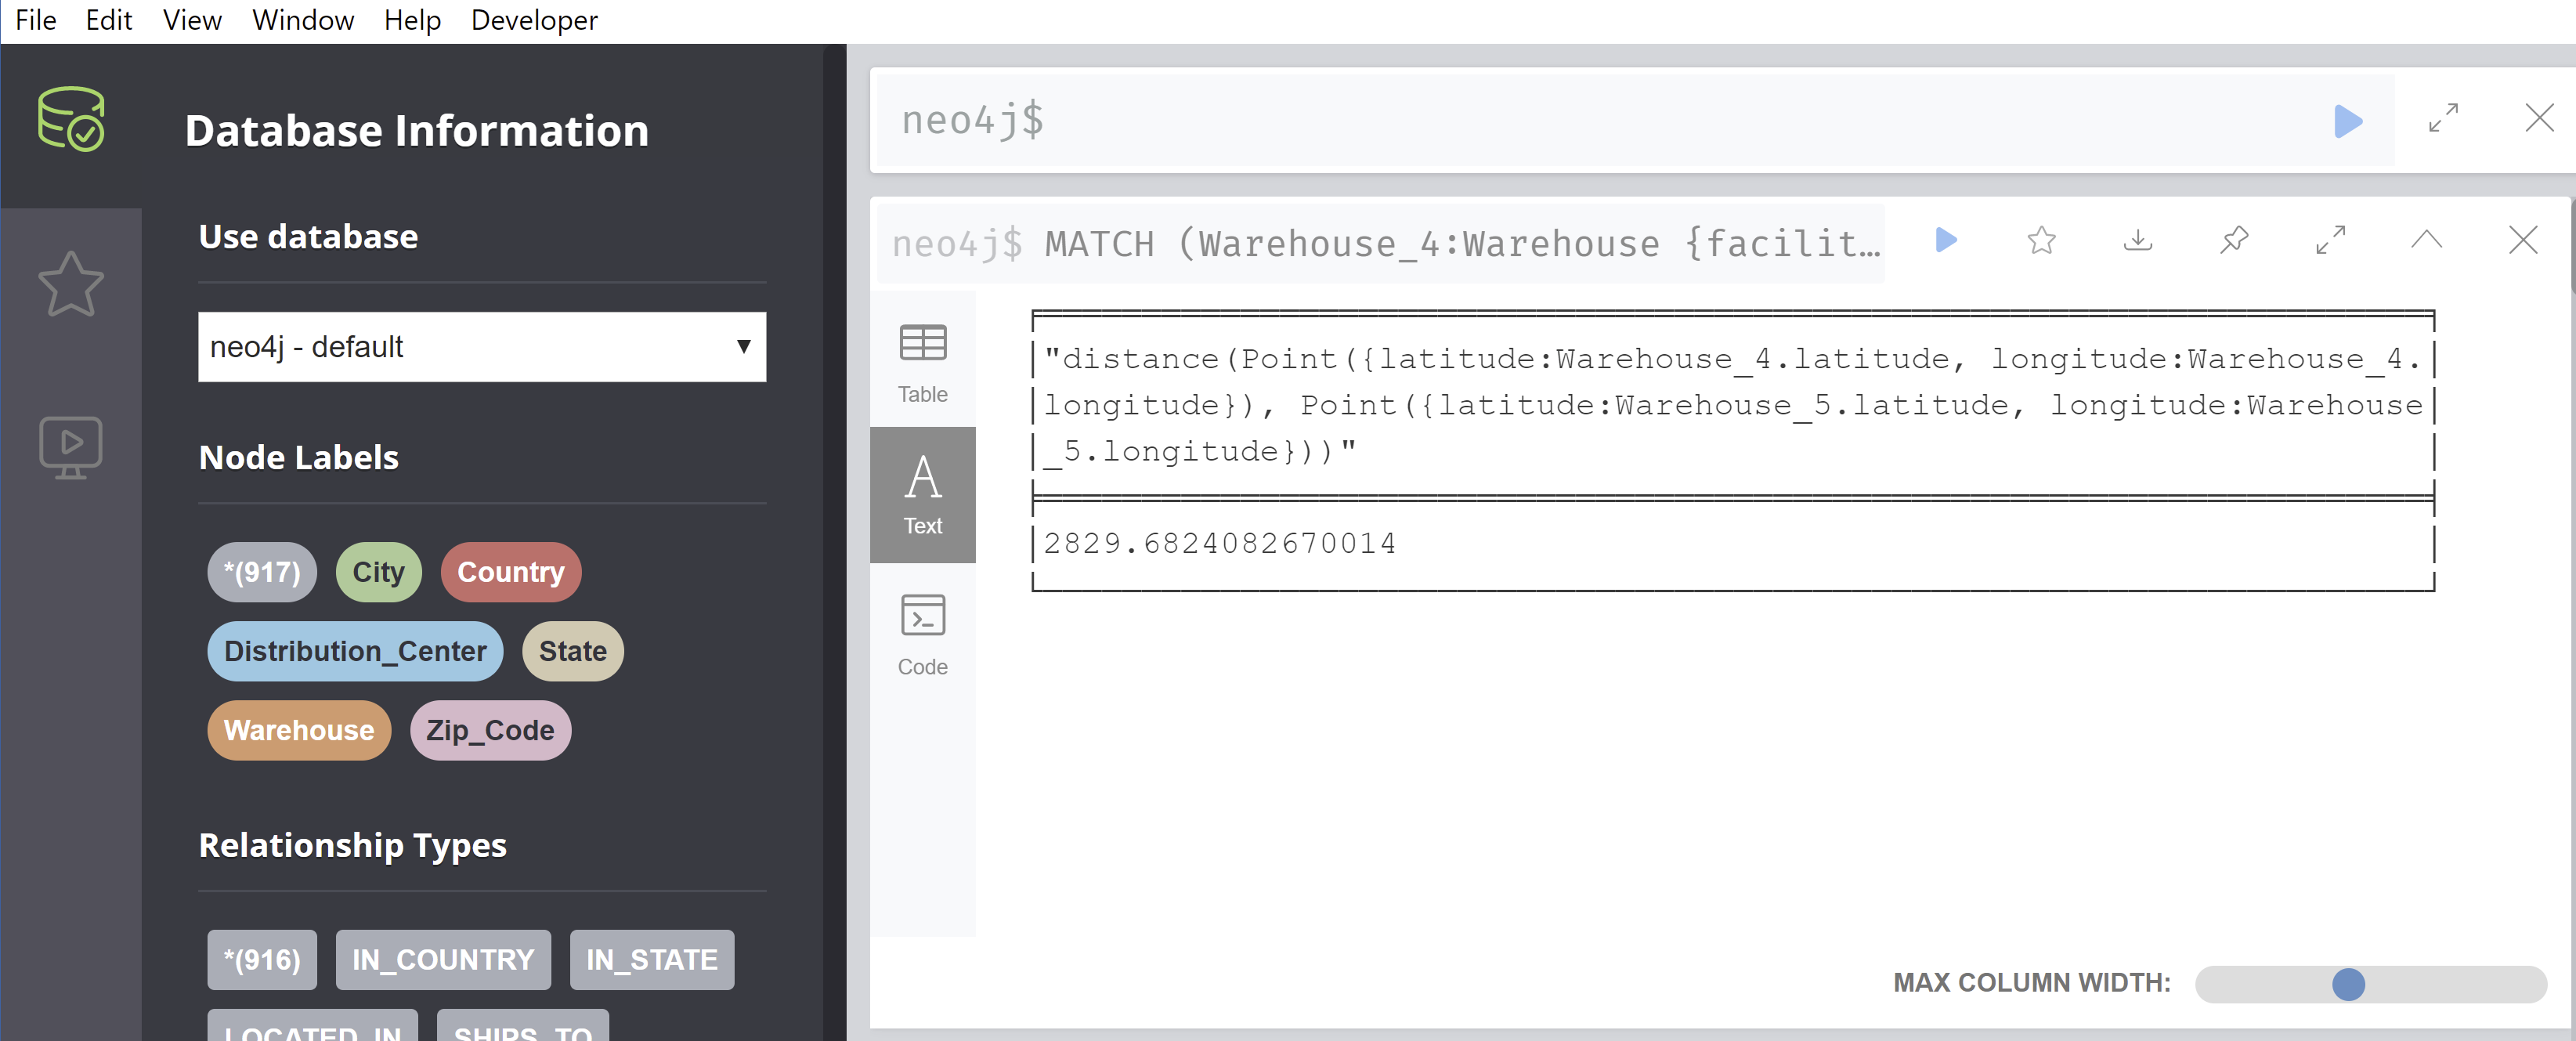


In [54]:
# example query
ex = graph.run("MATCH (Warehouse_4:Warehouse {facility_id: 'Warehouse_4'}) \
MATCH (Warehouse_5:Warehouse {facility_id: 'Warehouse_5'}) \
RETURN distance(Point({latitude:Warehouse_4.latitude, longitude:Warehouse_4.longitude}), \
               Point({latitude:Warehouse_5.latitude, longitude:Warehouse_5.longitude}))").data()

ex                   

[{'distance(Point({latitude:Warehouse_4.latitude, longitude:Warehouse_4.longitude}),                Point({latitude:Warehouse_5.latitude, longitude:Warehouse_5.longitude}))': 2829.6824082670014}]

RS Output:
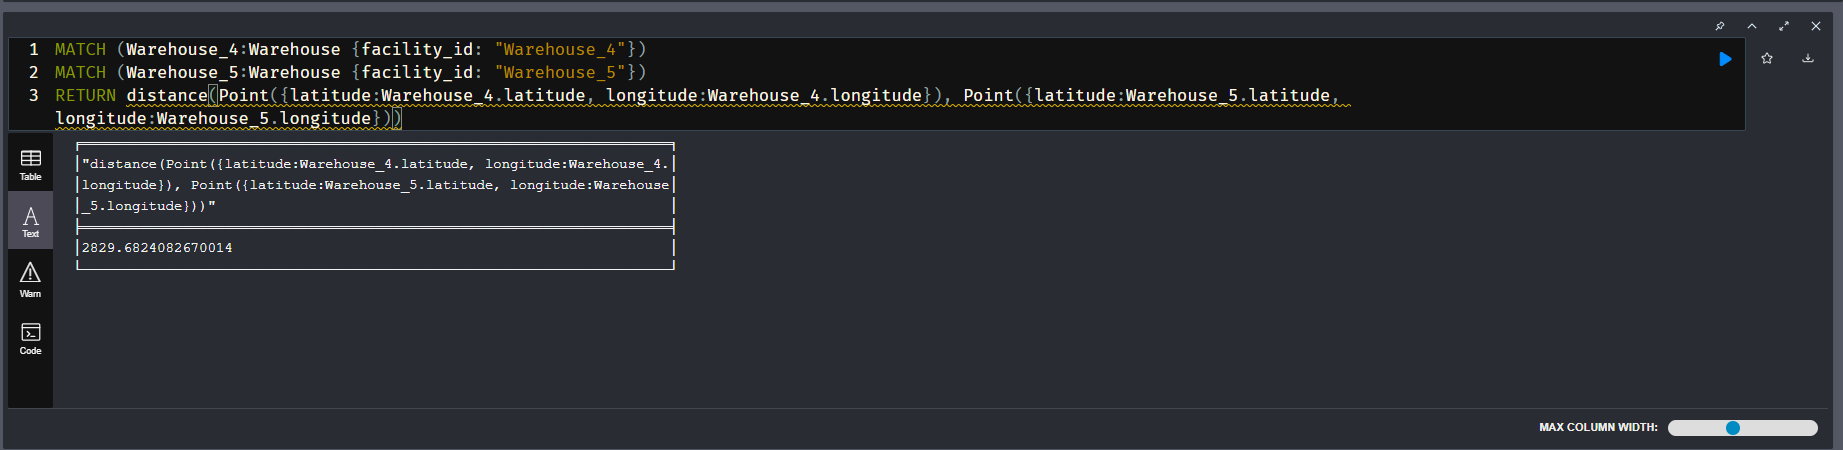

In [55]:
avg_return_df = df_merged.groupby(['Warehouse ID supplying this Distribution Center'])['Order_Returned'].mean().reset_index(name = 'Average returns')
avg_return_df


Warehouse ID supplying this Distribution Center  Average returns
0                                      Warehouse_1         0.440703
1                                     Warehouse_12         0.424884
2                                     Warehouse_13         0.448882
3                                     Warehouse_15         0.429766
4                                     Warehouse_16         0.431641
5                                     Warehouse_17         0.432117
6                                     Warehouse_18         0.434963
7                                     Warehouse_19         0.441624
8                                      Warehouse_2         0.422798
9                                      Warehouse_3         0.445221
10                                     Warehouse_4         0.429615
11                                     Warehouse_5         0.438596

In [56]:
# highest number of returns vs closest neighbor
avg_return_df.sort_values(by=['Average returns'], ascending=False)
      

Warehouse ID supplying this Distribution Center  Average returns
2                                     Warehouse_13         0.448882
9                                      Warehouse_3         0.445221
7                                     Warehouse_19         0.441624
0                                      Warehouse_1         0.440703
11                                     Warehouse_5         0.438596
6                                     Warehouse_18         0.434963
5                                     Warehouse_17         0.432117
4                                     Warehouse_16         0.431641
3                                     Warehouse_15         0.429766
10                                     Warehouse_4         0.429615
1                                     Warehouse_12         0.424884
8                                      Warehouse_2         0.422798

Warehouse_13 has the highest average returns

In [57]:
nn_warehouse_13 = graph.run("MATCH (w:Warehouse) MATCH (Warehouse_13:Warehouse {facility_id: 'Warehouse_13'}) with w.facility_id as warehouse_id, point.distance(Point({latitude:Warehouse_13.latitude, longitude:Warehouse_13.longitude}), Point({latitude:w.latitude, longitude:w.longitude})) as distance RETURN warehouse_id, distance").data()

nn_warehouse_13


[{'warehouse_id': 'Warehouse_1', 'distance': 2791312.8058269816},
 {'warehouse_id': 'Warehouse_2', 'distance': 2795536.7165578115},
 {'warehouse_id': 'Warehouse_3', 'distance': 2800197.8196339835},
 {'warehouse_id': 'Warehouse_4', 'distance': 3935035.820089901},
 {'warehouse_id': 'Warehouse_5', 'distance': 3935306.9253235175},
 {'warehouse_id': 'Warehouse_6', 'distance': 3935442.1978266593},
 {'warehouse_id': 'Warehouse_7', 'distance': 3935119.37828669},
 {'warehouse_id': 'Warehouse_8', 'distance': 3935035.820089901},
 {'warehouse_id': 'Warehouse_9', 'distance': 3935035.820089901},
 {'warehouse_id': 'Warehouse_10', 'distance': 4167380.0035451734},
 {'warehouse_id': 'Warehouse_11', 'distance': 4166832.1676822547},
 {'warehouse_id': 'Warehouse_12', 'distance': 14115.965716263292},
 {'warehouse_id': 'Warehouse_13', 'distance': 0.0},
 {'warehouse_id': 'Warehouse_14', 'distance': 24131.143382791557},
 {'warehouse_id': 'Warehouse_15', 'distance': 3741505.0911844177},
 {'warehouse_id': 'Wareh

In [58]:
nn_df = pd.DataFrame(data=nn_warehouse_13)
# convert to int for readability
nn_df['distance'] = nn_df['distance'].astype(int)
nn_df.sort_values(by=['distance'])

warehouse_id  distance
12  Warehouse_13         0
11  Warehouse_12     14115
13  Warehouse_14     24131
21  Warehouse_22   1981457
19  Warehouse_20   1985574
18  Warehouse_19   1989813
17  Warehouse_18   1989813
20  Warehouse_21   1989813
0    Warehouse_1   2791312
1    Warehouse_2   2795536
2    Warehouse_3   2800197
15  Warehouse_16   3738126
14  Warehouse_15   3741505
16  Warehouse_17   3741505
7    Warehouse_8   3935035
3    Warehouse_4   3935035
8    Warehouse_9   3935035
6    Warehouse_7   3935119
4    Warehouse_5   3935306
5    Warehouse_6   3935442
10  Warehouse_11   4166832
9   Warehouse_10   4167380

The nearest neighbor in distance to warehouse_13 is warehouse_12.

Distance is in meters here <br>
50 miles = 80,467.2 <br>
200 miles = 321,869 meters<br>

Nothing here seems to fall within that range... <br>

If we are simply looking for more than 50 miles away:

In [59]:
nn_warehouse_13_50m = graph.run("MATCH (w:Warehouse) MATCH (Warehouse_13:Warehouse {facility_id: 'Warehouse_13'}) with w.facility_id as warehouse_id, point.distance(Point({latitude:Warehouse_13.latitude, longitude:Warehouse_13.longitude}), Point({latitude:w.latitude, longitude:w.longitude})) as distance WHERE distance > 80467.2 RETURN warehouse_id, distance").data()

nn_warehouse_13_50m

[{'warehouse_id': 'Warehouse_1', 'distance': 2791312.8058269816},
 {'warehouse_id': 'Warehouse_2', 'distance': 2795536.7165578115},
 {'warehouse_id': 'Warehouse_3', 'distance': 2800197.8196339835},
 {'warehouse_id': 'Warehouse_4', 'distance': 3935035.820089901},
 {'warehouse_id': 'Warehouse_5', 'distance': 3935306.9253235175},
 {'warehouse_id': 'Warehouse_6', 'distance': 3935442.1978266593},
 {'warehouse_id': 'Warehouse_7', 'distance': 3935119.37828669},
 {'warehouse_id': 'Warehouse_8', 'distance': 3935035.820089901},
 {'warehouse_id': 'Warehouse_9', 'distance': 3935035.820089901},
 {'warehouse_id': 'Warehouse_10', 'distance': 4167380.0035451734},
 {'warehouse_id': 'Warehouse_11', 'distance': 4166832.1676822547},
 {'warehouse_id': 'Warehouse_15', 'distance': 3741505.0911844177},
 {'warehouse_id': 'Warehouse_16', 'distance': 3738126.994459281},
 {'warehouse_id': 'Warehouse_17', 'distance': 3741505.0911844177},
 {'warehouse_id': 'Warehouse_18', 'distance': 1989813.4533252625},
 {'warehou

In [60]:
nn_df_50 = pd.DataFrame(data=nn_warehouse_13_50m)
# convert to int for readability
nn_df_50['distance'] = nn_df_50['distance'].astype(int)
nn_df_50.sort_values(by=['distance'])

warehouse_id  distance
18  Warehouse_22   1981457
16  Warehouse_20   1985574
15  Warehouse_19   1989813
14  Warehouse_18   1989813
17  Warehouse_21   1989813
0    Warehouse_1   2791312
1    Warehouse_2   2795536
2    Warehouse_3   2800197
12  Warehouse_16   3738126
11  Warehouse_15   3741505
13  Warehouse_17   3741505
7    Warehouse_8   3935035
8    Warehouse_9   3935035
3    Warehouse_4   3935035
6    Warehouse_7   3935119
4    Warehouse_5   3935306
5    Warehouse_6   3935442
10  Warehouse_11   4166832
9   Warehouse_10   4167380

Warehouse_22 would be the nearest neighbor

<div class="alert alert-info">   
    
## Requirement #10
### To offload the busiest distribution center with highest number of delayed deliveries, identify the distribution center that has the forecast for the highest number of delayed deliveries, and find its nearest neighboring distribution center that has the lowest number of delayed deliveries (consider 1-20 miles radius)
    
        - After you identify the busiest distribution center with highest number of delayed deliveries and the delayed deliveries for every distribution center
        - Use Neo4j to calculate the distance of the nearest neighbor
        - You must submit your cypher code and output from Neo4j in the MARKEDDOWN cell below

    
</div>

In [61]:
# ADD YOUR Python CODE HERE
avg_delay_dist_df = delayed_df.groupby([' Distribution Center ID Serving this Zip Code'])['Order_ID'].count()/12
avg_delay_dist_df


 Distribution Center ID Serving this Zip Code
DistributionCenter_13    48.416667
DistributionCenter_14     8.583333
DistributionCenter_2     62.333333
DistributionCenter_37    44.250000
DistributionCenter_38    28.750000
DistributionCenter_50    13.833333
DistributionCenter_51    46.416667
DistributionCenter_65    52.750000
DistributionCenter_66    18.916667
DistributionCenter_84     3.750000
DistributionCenter_85    21.333333
DistributionCenter_86     5.333333
DistributionCenter_93    16.083333
Name: Order_ID, dtype: float64

In [62]:
# highest number of returns vs closest neighbor
avg_delay_dist_df.sort_values(ascending=False)

 Distribution Center ID Serving this Zip Code
DistributionCenter_2     62.333333
DistributionCenter_65    52.750000
DistributionCenter_13    48.416667
DistributionCenter_51    46.416667
DistributionCenter_37    44.250000
DistributionCenter_38    28.750000
DistributionCenter_85    21.333333
DistributionCenter_66    18.916667
DistributionCenter_93    16.083333
DistributionCenter_50    13.833333
DistributionCenter_14     8.583333
DistributionCenter_86     5.333333
DistributionCenter_84     3.750000
Name: Order_ID, dtype: float64

Distribution center with the most average delayed orders per month is DistributinoCenter_2

In [63]:
nn_dist_2 = graph.run("MATCH (d:Distribution_Center) MATCH (DistributionCenter_2:Distribution_Center {facility_id: 'DistributionCenter_2'}) with d.facility_id as dist_id, point.distance(Point({latitude:DistributionCenter_2.latitude, longitude:DistributionCenter_2.longitude}), Point({latitude:d.latitude, longitude:d.longitude})) as distance RETURN dist_id, distance").data()

nn_dist_2


[{'dist_id': 'DistributionCenter_1', 'distance': 6406.67167310984},
 {'dist_id': 'DistributionCenter_10', 'distance': 10201.621275716156},
 {'dist_id': 'DistributionCenter_11', 'distance': 12207.398096022484},
 {'dist_id': 'DistributionCenter_12', 'distance': 1152567.994582787},
 {'dist_id': 'DistributionCenter_13', 'distance': 1153573.6801534777},
 {'dist_id': 'DistributionCenter_14', 'distance': 1150830.300797751},
 {'dist_id': 'DistributionCenter_15', 'distance': 1152567.994582787},
 {'dist_id': 'DistributionCenter_16', 'distance': 1151212.6916649956},
 {'dist_id': 'DistributionCenter_17', 'distance': 1152567.994582787},
 {'dist_id': 'DistributionCenter_18', 'distance': 1149010.6760718331},
 {'dist_id': 'DistributionCenter_19', 'distance': 1152567.994582787},
 {'dist_id': 'DistributionCenter_2', 'distance': 0.0},
 {'dist_id': 'DistributionCenter_20', 'distance': 1154665.0855537078},
 {'dist_id': 'DistributionCenter_21', 'distance': 1151109.0475853258},
 {'dist_id': 'DistributionCent

In [64]:
nn_df_dist = pd.DataFrame(data=nn_dist_2)
# convert to int for readability
nn_df_dist['distance'] = nn_df_dist['distance'].astype(int)
nn_df_dist.sort_values(by=['distance'])

dist_id  distance
11   DistributionCenter_2         0
22   DistributionCenter_3      4135
0    DistributionCenter_1      6406
55   DistributionCenter_6      6455
1   DistributionCenter_10     10201
..                    ...       ...
34  DistributionCenter_40   2820107
29  DistributionCenter_36   2820107
28  DistributionCenter_35   2820107
32  DistributionCenter_39   2820107
35  DistributionCenter_41   2820176

[97 rows x 2 columns]

Neareset neighbor to distribution center 2 is distribution center 3 at 4135 meters. <br>

1 mile = 1609.34 meters <br>
20 miles = 32186.9 meters

In [65]:
nn_dist_2_limited = graph.run("MATCH (d:Distribution_Center) MATCH (DistributionCenter_2:Distribution_Center {facility_id: 'DistributionCenter_2'}) with d.facility_id as dist_id, point.distance(Point({latitude:DistributionCenter_2.latitude, longitude:DistributionCenter_2.longitude}), Point({latitude:d.latitude, longitude:d.longitude})) as distance where distance > 1609 and distance < 32186 RETURN dist_id, distance").data()

nn_dist_2_limited

[{'dist_id': 'DistributionCenter_1', 'distance': 6406.67167310984},
 {'dist_id': 'DistributionCenter_10', 'distance': 10201.621275716156},
 {'dist_id': 'DistributionCenter_11', 'distance': 12207.398096022484},
 {'dist_id': 'DistributionCenter_3', 'distance': 4135.39114338677},
 {'dist_id': 'DistributionCenter_4', 'distance': 12207.398096022484},
 {'dist_id': 'DistributionCenter_5', 'distance': 12365.483523080624},
 {'dist_id': 'DistributionCenter_6', 'distance': 6455.030594937857},
 {'dist_id': 'DistributionCenter_7', 'distance': 12207.398096022484},
 {'dist_id': 'DistributionCenter_8', 'distance': 12207.398096022484},
 {'dist_id': 'DistributionCenter_9', 'distance': 16008.252524290654}]

In [66]:
nn_df_dist_limited = pd.DataFrame(data=nn_dist_2_limited)
# convert to int for readability
nn_df_dist_limited['distance'] = nn_df_dist_limited['distance'].astype(int)
nn_df_dist_limited.sort_values(by=['distance'])

dist_id  distance
3   DistributionCenter_3      4135
0   DistributionCenter_1      6406
6   DistributionCenter_6      6455
1  DistributionCenter_10     10201
2  DistributionCenter_11     12207
4   DistributionCenter_4     12207
7   DistributionCenter_7     12207
8   DistributionCenter_8     12207
5   DistributionCenter_5     12365
9   DistributionCenter_9     16008

Limiting the query to consider 1-20 miles radius, distribution center 3 is the nearest neighbor.